In [1]:
import numpy as np
import scipy as sp

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
N = 100
mu_arr = np.array([1, 10])
sigma_arr = np.array([1, 1])
x = np.append(np.random.normal(mu_arr[0], sigma_arr[0], N), 
              np.random.normal(mu_arr[1], sigma_arr[1], N))
x[:10]

array([ 1.37090897,  0.8123116 ,  0.64166649,  0.74198691,  0.02315833,
        0.80692107,  2.41703953, -0.37524843,  2.79565017,  3.1624325 ])

<AxesSubplot:ylabel='Count'>

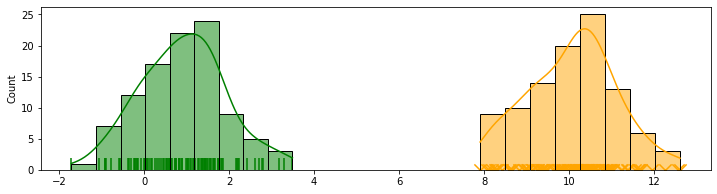

In [9]:
fig, ax = plt.subplots(figsize=(12,3))
ax.scatter(x[:N], np.zeros(N), c='green', marker=2, s=150)
ax.scatter(x[N:], np.zeros(N), c='orange', marker='x', s=150)
#ax.set_ylim([-1e-4, 1e-4])
#_ = ax.set_yticks([])
sns.histplot(x[:N], color='green',kde=True)
sns.histplot(x[N:], color='orange',kde=True)

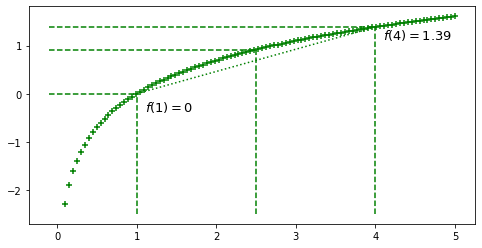

In [10]:
x = np.linspace(.1, 5, 100)
y = np.log(x)
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(x, y, color='green', marker='+')
## 1 (p=0.5)
ax.vlines(x=1, ymin=-2.5, ymax=0, linestyle='--', color='green')
ax.hlines(y=0, xmin=-.1, xmax=1, linestyle='--', color='green')
ax.text(x=1.1, y=np.log(.7), s='$f(1)=0$',
        fontdict={'size': 13})
## 4 (p=0.5)
ax.vlines(x=4, ymin=-2.5, ymax=np.log(4), linestyle='--', color='green')
ax.hlines(y=np.log(4), xmin=-.1, xmax=4, linestyle='--', color='green')
ax.text(x=4.1, y=np.log(3.1), 
        s='$f(4)=%.2f$'%(np.log(4)),
        fontdict={'size': 13}
       )
ax.plot([1, 4], np.log([1, 4]), color='green', linestyle='dotted')
# E(x) = (1+4)/2 = 2.5
ax.vlines(x=2.5, ymin=-2.5, ymax=np.log(2.5), linestyle='--', color='green')
ax.hlines(y=np.log(2.5), xmin=-.1, xmax=2.5, linestyle='--', color='green')


----------


Basic Background
--------

Given three variables $x$- observed variable ($m$ data pojnts), $z$- hidden variable ($n$ classes), and the set of parameters $\theta$. Our goal is to maximize, 

\begin{align}
L(\theta) &= \prod_i p(x^{(i)};\theta) \tag{1}\\
\log L(\theta) &= \sum_i \log{p(x^{(i)};\theta)} \\
&= \sum_i \log{ \sum_{z^{(i)}}} p(x^{(i)},z^{(i)};\theta)\tag{2}
\end{align}

Life is more difficult when there is a summation inside the log. It makes the derivative intractable.
\begin{align}
\log L(\theta) &= \sum_i \log{ \sum_{z^{(i)}}} p(x^{(i)},z^{(i)};\theta)\tag{2} \\
&= \sum_i \log{ \sum_{z^{(i)}}} q_i(z^{(i)}) \frac{p(x^{(i)},z^{(i)};\theta)}{q_i(z^{(i)})}\tag{3}
\end{align}

$q_i(z^{(i)})$ is any arbitrary probability distribution on $z^{(i)}$, therefore, $q_i(z^{(i)}) \geq 0$ and $\sum_{z^{(i)}} q_i(z^{(i)}) = 1$

Note that the distribution is over the latent random variable $z^{(i)}$, and it can take any value signifying the class number. (For a two class example $z^{(i)} \in \{1,2\}$)

Another way of rewriting the probability is as follows, 

\begin{align}
\log L(\theta) &= \sum_i \log{ \sum_{z^{(i)}}} q_i(z^{(i)}) \frac{p(x^{(i)},z^{(i)};\theta)}{q_i(z^{(i)})}\tag{3} \\
&= \sum_i \log {E_{z^{(i)} \sim q_i(z^{(i)}) } \big[ \frac{p(x^{(i)},z^{(i)};\theta)}{q_i(z^{(i)})}  } \big] \tag{4} \\
&\geq \sum_i {E_{z^{(i)} \sim q_i(z^{(i)}) }  \big[ \log { \frac{p(x^{(i)},z^{(i)};\theta)}{q_i(z^{(i)})}  }} \big] \tag{5}\\
&= \sum_i \sum_{z^{(i)}}  q_i(z^{(i)}) \log { \frac{p(x^{(i)},z^{(i)};\theta)}{q_i(z^{(i)})}  } \tag{6} \\
&= \mathcal{L}(q,\theta)
\end{align}

The RHS of equation (6) is also called ELBO

To simplify, for a moment let's concentrate on one data point $i$, we know that $\sum_{z^{(i)}} q_i(z^{(i)}) = 1$, therefore
\begin{align}
\log{p(x^{(i)};\theta)} &= \sum_{z^{(i)}} q_i(z^{(i)}) \log{p(x^{(i)};\theta)} \\
&= \sum_{z^{(i)}} q_i(z^{(i)}) \log{ \frac{p(x^{(i)}, z^{(i)}; \theta)}{p(z^{(i)}; x^{(i)}, \theta)} } \\
&= \sum_{z^{(i)}} q_i(z^{(i)}) \log{ \Big[ \frac{p(x^{(i)}, z^{(i)}; \theta)}{q_i(z^{(i)})} \frac{q_i(z^{(i)})}{p(z^{(i)}; x^{(i)}, \theta)} \Big] } \\
&= \sum_{z^{(i)}} q_i(z^{(i)}) \Bigg[ \log{ \Big[ \frac{p(x^{(i)}, z^{(i)}; \theta)}{q_i(z^{(i)})} \Big] } -  \log{ \Big[ \frac{q_i(z^{(i)})}{p(z^{(i)}; x^{(i)}, \theta)} \Big] } \Bigg] \\
&= \sum_{z^{(i)}} q_i(z^{(i)}) \log{ \Big[ \frac{p(x^{(i)}, z^{(i)}; \theta)}{q_i(z^{(i)})} \Big] } - \sum_{z^{(i)}} q_i(z^{(i)}) \log{ \Big[ \frac{q_i(z^{(i)})}{p(z^{(i)}; x^{(i)}, \theta)} \Big] } \\
\end{align}

$- \sum_{z^{(i)}} q_i(z^{(i)}) \log{ \Big[ \frac{q_i(z^{(i)})}{p(z^{(i)}; x^{(i)}, \theta)} \Big] }$ is also known as KL divergence between $ q_i(z^{(i)})$ and $p(z^{(i)}; x^{(i)}, \theta)$

putting back the summation over all data

\begin{align}
\log L(\theta) &= \mathcal{L}(q,\theta) + KL(q||p) \tag{7}
\end{align}

It is clear that the best approximate distribution $ q_i(z^{(i)}) $ is $p(z^{(i)}; x^{(i)}, \theta)$, in which case the divergence becomes zero. 

## E-step

In E-step we fix $\theta = \theta^0$, and maximize $q$ in 
\begin{align}
\operatorname{argmax}_{q} \mathcal{L}(q,\theta^0) &= \operatorname{argmax}_{q} \big[ \log{L(\theta^0)} - KL(q||p) \big] \\
&= \operatorname{argmax}_{q} \big[ - KL(q||p) \big]\\
\end{align}

The negation can conver the maximization to minimization and the lowest value is $0$, $$q^0_i(z^{(i)}) = p(z^{(i)}; x^{(i)}, \theta^0)$$

## M-step

In M-step, we replace $q_i(z^{(i)})$ with $p(z^{(i)}; x^{(i)}, \theta^0)$ in equation(6)
$$\mathcal{L}(q,\theta) = \sum_i \sum_{z^{(i)}}  q_i(z^{(i)}) \log { \frac{p(x^{(i)},z^{(i)};\theta)}{q_i(z^{(i)})}  }  $$

We get, again removing the outer summation, 
\begin{align}
\mathcal{L}(q^0,\theta) &= \sum_{z^{(i)}}  p(z^{(i)}; x^{(i)}, \theta^0) \log { \frac{p(x^{(i)},z^{(i)};\theta)}{ p(z^{(i)}; x^{(i)}, \theta^0) }  } \\
&= \sum_{z^{(i)}}   p(z^{(i)}| x^{(i)}, \theta^0) \log{p(x^{(i)},z^{(i)}|\theta)} - \sum_{z^{(i)}} p(z^{(i)}| x^{(i)}, \theta^0) \log{p(z^{(i)}| x^{(i)}, \theta^0)} \tag{8}
\end{align}

The last part of equation 8, $\sum_{z^{(i)}} p(z^{(i)}| x^{(i)}, \theta^0) \log{p(z^{(i)}| x^{(i)}, \theta^0)}$ does not have $\theta$.

If we optimize with respect to $\theta$
\begin{align}
\operatorname{argmax}_{\theta} \mathcal{L}(q^0,\theta) &=   \operatorname{argmax}_{\theta} \big[ \sum_{z^{(i)}}   p(z^{(i)}| x^{(i)}, \theta^0) \log{p(x^{(i)},z^{(i)}|\theta)} \big] \tag{9}
\end{align}

We get back the actual parameters by differentiating Equation 9, when such differentiation is doable. A proper usecase is the Gaussian mixture problem. 

Let's assume that there are $m$ data points and $K$ classes. 

- $\mu_k$ mean of $k^{th}$ gaussian component
- $\Sigma_k$ covariance of $k^{th}$ gaussian component
- $\phi_k$
- $z^{(i)}$ the latent variable that denotes the class of data point $x^{(i)}$

To understand how the algorithm manifests, let's first define $q_i(z^{(i)}) = p(z^{(i)}|x^{(i)},\theta^0)$, in words this tells us the probability of $z^{(i)}$ to be a particular class,
\begin{align}
p(z^{(i)} = k | x^{(i)}, \theta) &= \frac{ p(x^{(i)} | z^{(i)} = k , \theta ) }{ p(x^{(i)} | \theta) } \\
&= \frac{ p(x^{(i)} | z^{(i)} = k , \theta ) }{ \sum_{j} p(x^{(i)} | z^{(i)} = j, \theta) } \\
w_i^k &= \frac{ \pi_k N(x^{(i)} | \mu_k, \Sigma_k) }{ \sum_{j=1}^{K} \pi_j N(x^{(i)} | \mu_j, \Sigma_j) }
\end{align}

For the ease of computation, we assume that $$w_i^k = p(z^{(i)} = k | x^{(i)}, \theta)$$

Putting back the value for in the equation for the M-step
\begin{align}
\sum_{z^{(i)}}   p(z^{(i)}| x^{(i)}, \theta^0) \log{p(x^{(i)},z^{(i)}|\theta)}  = \sum_{z^{(i)}=k}   w_i^k \log { \big[ \pi_k N(x^{(i)}|\mu_k,\Sigma_k) \big] } 
\end{align}

The equation to be solved after adding the summation for all of data is as following,

\begin{align}
\sum_{i} \sum_{z^{(i)}}   p(z^{(i)}| x^{(i)}, \theta^0) \log{p(x^{(i)},z^{(i)}|\theta)} &= \sum_{i} \sum_{z^{(i)}=k} w_i^k \log{ \big[ \pi_k \frac{1}{(2*3.14)^d\sqrt{\Sigma_k}} \exp{\{-\frac{1}{2}(x^{(i)} - \mu_k)^{T}\Sigma_k^{-1} } (x^{(i)} - \mu_k)\} \big] }\\
&= \sum_{i} \sum_{z^{(i)}=k} w_i^k \big[ \log{\pi_k} - \frac{1}{2}\log{|\Sigma_k|} -\frac{1}{2}\{ (x^{(i)} - \mu_k)^{T}\Sigma_k^{-1}  (x^{(i)} - \mu_k)\} \big] \\
\end{align}

The derivation of the above equation [here](http://www.cs.cornell.edu/courses/cs4786/2016fa/lectures/lecnotes13.pdf)

The final set of equations after differentiating and setting them to 0,
\begin{align}
\hat{\mu_k} &= \frac{\sum_i w_i^k x^{(i)}}{\sum_i w_i^k} \\
\hat{\pi_k} &= \frac{\sum_i w_i^k}{m} \\
\hat{\Sigma_k} &= \frac{\sum_i w_i^k (x^{(i)} - \mu_k) (x^{(i)} - \mu_k)^T}{\sum_i w_i^k}
\end{align}

In [141]:
class GMM(object):
    def __init__(self, X, k=2):
        # dimension
        X = np.asarray(X)
        self.m, self.n = X.shape
        self.data = X.copy()
        # number of mixtures
        self.k = k
        self.store_mean = []
        self.store_sigma = []
        
    def _init(self):
        # init mixture means/sigmas
        self.mean_arr = np.asmatrix(np.random.random((self.k, self.n)))
        self.sigma_arr = np.array([np.asmatrix(np.identity(self.n)) for i in range(self.k)])
        self.phi = np.ones(self.k)/self.k
        self.w = np.asmatrix(np.empty((self.m, self.k), dtype=float))
        #print(self.mean_arr)
        #print(self.sigma_arr)
    
    def fit(self, tol=1e-4):
        self._init()
        self.store_mean.append(self.mean_arr.copy())
        self.store_sigma.append(self.sigma_arr.copy())
        num_iters = 0
        ll = 1
        previous_ll = 0
        while(ll-previous_ll > tol):
            previous_ll = self.loglikelihood()
            self._fit()
            self.store_mean.append(self.mean_arr.copy())
            self.store_sigma.append(self.sigma_arr.copy())
            num_iters += 1
            ll = self.loglikelihood()
            print('Iteration %d: log-likelihood is %.6f'%(num_iters, ll))
        print('Terminate at %d-th iteration:log-likelihood is %.6f'%(num_iters, ll))
    
    def loglikelihood(self):
        ll = 0
        for i in range(self.m):
            tmp = 0
            for j in range(self.k):
                #print(self.sigma_arr[j])
                tmp += sp.stats.multivariate_normal.pdf(self.data[i, :], 
                                                        self.mean_arr[j, :].A1, 
                                                        self.sigma_arr[j, :]) *\
                       self.phi[j]
            ll += np.log(tmp) 
        return ll
    
    def _fit(self):
        self.e_step()
        self.m_step()
        
    def e_step(self):
        # calculate w_j^{(i)}
        for i in range(self.m):
            den = 0
            for j in range(self.k):
                num = sp.stats.multivariate_normal.pdf(self.data[i, :], 
                                                       self.mean_arr[j].A1, 
                                                       self.sigma_arr[j]) *\
                      self.phi[j]
                den += num
                self.w[i, j] = num
            self.w[i, :] /= den
            assert self.w[i, :].sum() - 1 < 1e-6
            
    def m_step(self):
        for j in range(self.k):
            const = self.w[:, j].sum()
            self.phi[j] = 1/self.m * const
            _mu_j = np.zeros(self.n)
            _sigma_j = np.zeros((self.n, self.n))
            for i in range(self.m):
                _mu_j += (self.data[i, :] * self.w[i, j])
                _sigma_j += self.w[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
                #print((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
            self.mean_arr[j] = _mu_j / const
            self.sigma_arr[j] = _sigma_j / const
        
        #print(self.sigma_arr)

In [142]:
mu1 = [0, 3]
sigma1 = [[0.5, 0], [0, 0.8]]
mu2 = [20, 10]
sigma2 = np.identity(2)
X1 = np.random.multivariate_normal(mu1, sigma1, 20)
X2 = np.random.multivariate_normal(mu2, sigma2, 50)
X = np.vstack((X1,X2))
X.shape

(70, 2)

In [143]:
def get_contours(data,mu,sigma):
    N    = 200
    X    = np.linspace(data.min(axis=0)[0], data.max(axis=0)[0], N)
    Y    = np.linspace(data.min(axis=0)[1], data.max(axis=0)[1], N)
    X, Y = np.meshgrid(X, Y)
    pos  = np.dstack((X, Y))
    rv   = sp.stats.multivariate_normal(mu, sigma)
    Z    = rv.pdf(pos)
    return(X, Y, Z)

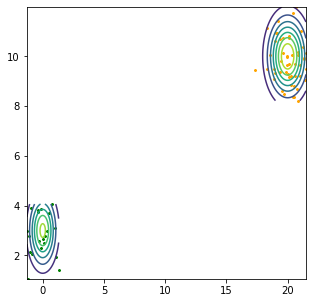

In [144]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c='green', marker='x', s=4)
ax.scatter(X2[:,0], X2[:,1], c='orange', marker='x', s=4)
out = get_contours(X1,mu1,sigma1)
ax.contour(out[0], out[1], out[2])
out2 = get_contours(X2,mu2,sigma2)
ax.contour(out2[0], out2[1], out2[2])

In [145]:
gmm = GMM(X)
gmm.fit()

Iteration 1: log-likelihood is -374.583468
Iteration 2: log-likelihood is -295.358259
Iteration 3: log-likelihood is -243.304593
Iteration 4: log-likelihood is -221.808544
Iteration 5: log-likelihood is -221.808259
Iteration 6: log-likelihood is -221.808259
Terminate at 6-th iteration:log-likelihood is -221.808259


In [147]:
gmm.mean_arr

matrix([[-0.12306932,  2.81499216],
        [20.04239422,  9.81322538]])

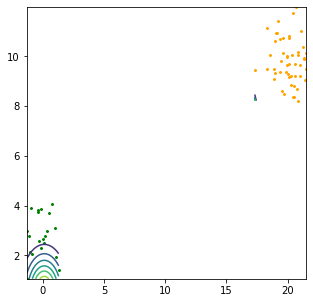

In [149]:
fig, ax = plt.subplots(figsize=(5,5))
j=0
ax.scatter(X1[:,0], X1[:,1], c='green', marker='x', s=4)
ax.scatter(X2[:,0], X2[:,1], c='orange', marker='x', s=4)
out = get_contours(X1,np.squeeze(np.array(gmm.store_mean[j][0])),gmm.store_sigma[j][0])
ax.contour(out[0], out[1], out[2])
out2 = get_contours(X2, np.squeeze(np.array(gmm.store_mean[j][1])),gmm.store_sigma[j][1])
ax.contour(out2[0], out2[1], out2[2])

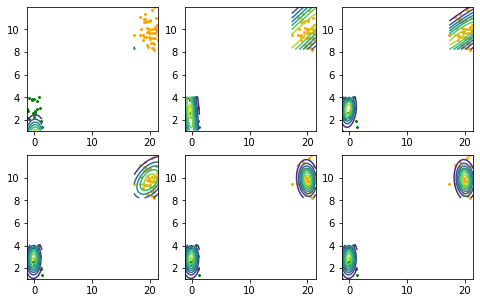

In [156]:
fig, axs = plt.subplots(2, 3,figsize=(8,5))
for j in range(6):
    col = j % 3
    row =  int(np.floor(j / 3))
    axs[row,col].scatter(X1[:,0], X1[:,1], c='green', marker='x', s=4)
    axs[row,col].scatter(X2[:,0], X2[:,1], c='orange', marker='x', s=4)
    out = get_contours(X1,np.squeeze(np.array(gmm.store_mean[j][0])),gmm.store_sigma[j][0])
    axs[row,col].contour(out[0], out[1], out[2])
    out2 = get_contours(X2, np.squeeze(np.array(gmm.store_mean[j][1])),gmm.store_sigma[j][1])
    axs[row,col].contour(out2[0], out2[1], out2[2])